In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from scipy import stats

import datetime

In [3]:
pd.reset_option('all')

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_7444\2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [4]:
data_origin = pd.read_csv("data_signs_with_outliers.csv")
data_origin

,Unnamed: 0,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,outliers
0,0,2018-04-09,38463471715,435,12,28,0 days,0,0,1,0
1,1,2018-04-10,36624943566,476,7,31,0 days,1,0,1,0
2,2,2018-04-11,90124869960,458,12,30,0 days,2,0,1,0
3,3,2018-04-12,54580391004,443,10,29,0 days,3,0,1,0
4,4,2018-04-13,80543078668,458,10,30,0 days,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2290,2290,2024-03-11,30656997473,467,30,34,0 days,0,162,1,0
2291,2291,2024-03-12,61550260885,458,26,34,0 days,1,162,1,0
2292,2292,2024-03-13,57912146515,458,29,34,0 days,2,162,1,0
2293,2293,2024-03-14,6038571654,422,26,31,0 days,3,162,1,1


In [5]:
data_origin[data_origin['ctl_loading_date'] == '2024-03-15']

,Unnamed: 0,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,outliers
2294,2294,2024-03-15,83427809714,458,29,34,0 days,4,162,1,0


In [6]:
data_origin = data_origin[data_origin['ctl_loading_date'] != '2024-03-15']
data_origin

,Unnamed: 0,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,outliers
0,0,2018-04-09,38463471715,435,12,28,0 days,0,0,1,0
1,1,2018-04-10,36624943566,476,7,31,0 days,1,0,1,0
2,2,2018-04-11,90124869960,458,12,30,0 days,2,0,1,0
3,3,2018-04-12,54580391004,443,10,29,0 days,3,0,1,0
4,4,2018-04-13,80543078668,458,10,30,0 days,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2289,2289,2024-03-10,70653532184,492,30,36,0 days,6,162,1,0
2290,2290,2024-03-11,30656997473,467,30,34,0 days,0,162,1,0
2291,2291,2024-03-12,61550260885,458,26,34,0 days,1,162,1,0
2292,2292,2024-03-13,57912146515,458,29,34,0 days,2,162,1,0


In [7]:
data_origin['outliers'].unique()

array([0, 1, 2], dtype=int64)

In [8]:
data_origin[data_origin['outliers'] == 0].shape[0]   

1784

In [9]:
data_origin[data_origin['outliers'] == 1].shape[0]   

355

In [10]:
data_origin[data_origin['outliers'] == 2].shape[0]   

155

In [11]:
data_outliers = data_origin[data_origin['outliers'] == 1]
data_outliers

,Unnamed: 0,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,outliers
6,6,2018-04-15,61093947578,422,7,26,0 days,6,0,1,1
8,8,2018-04-17,43797555261,424,10,26,0 days,1,0,1,1
17,17,2018-04-26,25902764987,428,14,27,0 days,3,0,1,1
18,18,2018-04-27,92328498590,428,12,27,0 days,4,0,1,1
26,26,2018-05-05,29731994185,426,11,26,0 days,5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2268,2268,2024-02-21,53098448173,431,25,31,0 days,2,158,1,1
2278,2278,2024-02-29,1884005607,424,25,31,0 days,3,158,1,1
2279,2279,2024-03-01,62433216496,436,29,31,0 days,4,158,1,1
2287,2287,2024-03-08,70519729204,438,28,32,0 days,4,162,1,1


## Предварительная обработка данных

In [12]:
total_rows = len(data_origin)
outliers_rows = len(data_origin[data_origin['outliers'] == 1])

percentage_outliers = (outliers_rows / total_rows) * 100
percentage_outliers

# Процент от общего количества строк, где outliers = 1

15.475152571926765

In [13]:
total_rows = len(data_origin)
outliers_rows = len(data_origin[data_origin['outliers'] == 2])

percentage_outliers = (outliers_rows / total_rows) * 100
percentage_outliers

# Процент от общего количества строк, где outliers = 2

6.756756756756757

In [14]:
data_origin.dtypes

Unnamed: 0                  int64
ctl_loading_date           object
ctl_loading                 int64
string_quantity             int64
duplicated_by_loading       int64
corrections                 int64
delay                      object
day_of_week                 int64
cumulative_missing_days     int64
rank                        int64
outliers                    int64
dtype: object

In [15]:
data_origin['delay'].unique()
# Очень много уникальных значений, лучше уберем этот атрибут. Еще уберем дату и уникальные айди у пакетов. И первый атрибут с индексом.

array(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
       '7 days', '347 days', '115 days', '207 days', '437 days',
       '304 days', '250 days', '68 days', '237 days', '485 days',
       '133 days', '199 days', '251 days', '8 days', '1051 days',
       '695 days', '1171 days', '208 days', '449 days', '716 days',
       '827 days', '103 days', '1084 days', '968 days', '1286 days',
       '86 days', '253 days', '461 days', '927 days', '404 days',
       '731 days', '571 days', '1465 days', '1080 days', '1057 days',
       '589 days', '335 days', '952 days', '67 days', '1442 days',
       '1459 days', '400 days', '1145 days', '1122 days', '709 days',
       '1496 days', '59 days', '322 days', '204 days', '534 days',
       '1391 days', '543 days', '1670 days', '926 days', '1434 days',
       '330 days', '57 days', '1514 days', '52 days', '1048 days',
       '58 days', '131 days', '464 days', '291 days', '35 days',
       '1890 days', '541 days', '353 days', '164 days', '

In [16]:
df_finished = data_origin.drop(['delay', 'ctl_loading_date', 'Unnamed: 0', 'ctl_loading'], axis=1)
df_finished.head(5)

,string_quantity,duplicated_by_loading,corrections,day_of_week,cumulative_missing_days,rank,outliers
0,435,12,28,0,0,1,0
1,476,7,31,1,0,1,0
2,458,12,30,2,0,1,0
3,443,10,29,3,0,1,0
4,458,10,30,4,0,1,0


In [17]:
df_finished.dtypes

string_quantity            int64
duplicated_by_loading      int64
corrections                int64
day_of_week                int64
cumulative_missing_days    int64
rank                       int64
outliers                   int64
dtype: object

In [18]:
# приведем все независимые переменные к единому масштабу

# снова создадим датафрейм без целевой переменной
df_finished_wihout_target = df_finished.drop(['outliers'], axis=1)

# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(df_finished_wihout_target)

# на выходе получается массив Numpy
type(scaled_data)

numpy.ndarray

In [19]:
# преобразуем scaled_data обратно в датафрейм
df_scaled = pd.DataFrame(scaled_data, columns = df_finished_wihout_target.columns)

# вновь добавим целевую переменную outliers
df_scaled['outliers'] = df_finished.outliers

# посмотрим на результат (только два первых значения)
df_scaled.head(2)

,string_quantity,duplicated_by_loading,corrections,day_of_week,cumulative_missing_days,rank,outliers
0,0.014940,-1.176918,-0.350345,-1.500302,-1.533535,-0.316894,0
1,0.435143,-1.868443,0.177358,-1.000709,-1.533535,-0.316894,0


In [20]:
# а также на основные статистическое показатели (масштаб должен быть другим!)
df_scaled.describe().round(2)

,string_quantity,duplicated_by_loading,corrections,day_of_week,cumulative_missing_days,rank,outliers
count,2294.00,2294.00,2294.00,2294.0,2294.00,2294.00,2294.00
mean,0.00,0.00,0.00,-0.0,-0.00,-0.00,0.29
std,1.00,1.00,1.00,1.0,1.00,1.00,0.58
min,-4.43,-2.84,-5.28,-1.5,-1.53,-0.32,0.00
25%,0.08,-0.49,-0.35,-1.0,-0.99,-0.32,0.00
50%,0.25,0.21,0.00,-0.0,-0.05,-0.32,0.00
75%,0.33,0.76,0.71,1.0,1.06,-0.32,0.00
max,0.65,1.73,5.63,1.5,1.62,7.06,2.00


## Исследовательский анализ данных

#### Найдем признаки с наибольшими отличиями в зависимости от значения целевой переменной

In [21]:
# сгруппируем данные по целевой переменной, рассчитаем среднее и перевернем (транспонируем) наш датафрейм
# все это последовательно делается с помощью group_by, mean() и .T
data = df_scaled.groupby('outliers').mean().T

# значения, чтобы убедиться в верности результата
data.head(6)

outliers,0,1,2
string_quantity,0.309934,-0.257362,-2.977795
duplicated_by_loading,0.179462,-0.056843,-1.935365
corrections,0.264125,-0.670930,-1.503347
day_of_week,-0.002365,-0.021227,0.075832
cumulative_missing_days,-0.101290,0.245182,0.604268
rank,-0.080503,-0.316894,1.652347


In [22]:
# вычтем одну колонку из другой и вычислим модуль
data['diff'] = abs(data.iloc[:, 0] - data.iloc[:, 1])

# остается отсортировать наш датафрейм по столбцу разницы средних в нисходящем порядке
data = data.sort_values(by = ['diff'], ascending = False)

# и вывести те значения, где разница наиболее существенная
data.head(6)

outliers,0,1,2,diff
corrections,0.264125,-0.670930,-1.503347,0.935055
string_quantity,0.309934,-0.257362,-2.977795,0.567296
cumulative_missing_days,-0.101290,0.245182,0.604268,0.346472
rank,-0.080503,-0.316894,1.652347,0.236391
duplicated_by_loading,0.179462,-0.056843,-1.935365,0.236306
day_of_week,-0.002365,-0.021227,0.075832,0.018862


Text(0.5, 1.0, 'Распределение corrections для трех типов поставок')

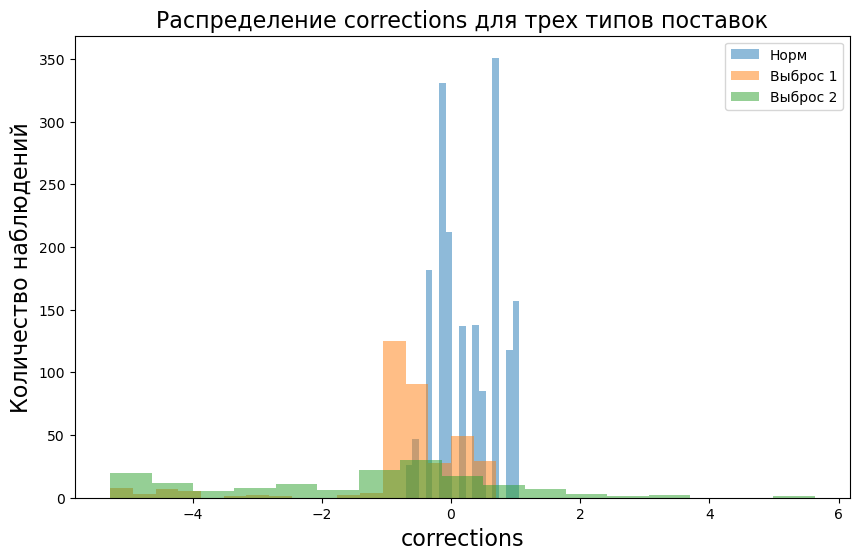

In [23]:
# задаем количество интервалов
bins = 17

# и размер графика
plt.figure(figsize = (10,6))

# из датафрейма df_scaled выберем столбец 'corrections'
# и только те строки, где outliers == 0 (норм)
plt.hist(df_scaled.loc[df_scaled['outliers'] == 0, 'corrections'], bins, alpha = 0.5, label = 'Норм')

# то же самое, но outliers == 1 (выброс)
plt.hist(df_scaled.loc[df_scaled['outliers'] == 1, 'corrections'], bins, alpha = 0.5, label = 'Выброс 1')
plt.legend(loc = 'upper right')

# то же самое, но outliers == 2 (выброс)
plt.hist(df_scaled.loc[df_scaled['outliers'] == 2, 'corrections'], bins, alpha = 0.5, label = 'Выброс 2')
plt.legend(loc = 'upper right')

# добавим подписи и размер шрифта
plt.xlabel('corrections', fontsize = 16)
plt.ylabel('Количество наблюдений', fontsize = 16)
plt.title('Распределение corrections для трех типов поставок', fontsize = 16)

## Отбор и выделение признаков

#### Поместим наши признаки в переменную X, а классы в переменную y

In [24]:
# для этого возьмем названия признаков из индекса нашего вспомогательного датафрейма data,
# преобразуем их в список и сделаем срез по первым 10 значениям
features = list(data.index[:6])
print(features)

['corrections', 'string_quantity', 'cumulative_missing_days', 'rank', 'duplicated_by_loading', 'day_of_week']


In [25]:
# теперь отфильтруем исходный датафрейм df_scaled по этим признакам
X = df_scaled[features]

# а в переменную y запишем классы
y = df_scaled['outliers']

## Обучение и оценка качества модели

#### Разделение на обучающую и тестовую выборки

In [26]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split

# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

#### Обучение модели и прогноз

In [27]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [28]:
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
num_outliers = np.sum(y_test)
print(num_outliers)

214


In [30]:
num_outliers = np.sum(y_train)
print(num_outliers)

451


In [31]:
# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

#### Оценка качества модели

In [32]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей тестовые и прогнозные значения
model_matrix = confusion_matrix(y_test, y_pred, labels = [0, 1, 2])

# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1,2
0,526,4,0
1,16,88,0
2,3,0,52


In [33]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - норм, 1 - выброс 
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз норм', 'Прогноз выброс 1', 'Прогноз выброс 2'], index = ['Факт норм', 'Факт выброс 1', 'Факт выброс 2'])
model_matrix_df

,Прогноз норм,Прогноз выброс 1,Прогноз выброс 2
Факт норм,526,4,0
Факт выброс 1,16,88,0
Факт выброс 2,3,0,52


In [34]:
# убедимся, что матрица верна
# посчитаем сколько было предсказанных значений (см. на столбцы)
# 0, 1 и 2 как в исходном датафрейме
unique, counts = np.unique(y_pred, return_counts = True)
unique, counts

(array([0, 1, 2], dtype=int64), array([545,  92,  52], dtype=int64))

In [35]:
# посчитаем сколько было фактических значений (см. на строки)
unique, counts = np.unique(y_test, return_counts = True)
unique, counts

(array([0, 1, 2], dtype=int64), array([530, 104,  55], dtype=int64))

In [36]:
# мы можем воспользоваться встроенной в sklearn метрикой, чтобы рассчитать accuracy или долю правильных прогнозов
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy, 3)

0.967

## Дубль два

In [40]:
from xgboost import XGBClassifier, plot_importance, plot_tree

In [41]:
xgb_cls = XGBClassifier(n_estimators = 100, learning_rate = 0.3, n_jobs = -1, random_state = 1)

In [42]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
y_pred = xgb_cls.predict(X_test)

from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       530
           1       0.96      0.91      0.94       104
           2       1.00      1.00      1.00        55

    accuracy                           0.98       689
   macro avg       0.98      0.97      0.97       689
weighted avg       0.98      0.98      0.98       689



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

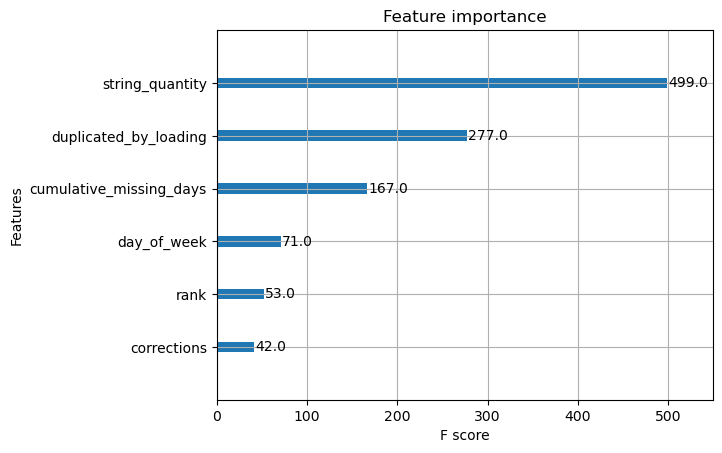

In [45]:
plot_importance(xgb_cls) # отбор признаков с помощью алгоритма

## Попробуем предсказать

In [46]:
new_data = {'Unnamed: 0': [2294],
            'ctl_loading_date': ['2024-03-15'],
            'ctl_loading': [83427809714],
            'string_quantity': [458],
            'duplicated_by_loading': [29],
            'corrections': [34],
            'delay': ['0 days'],
            'day_of_week': [4],
            'cumulative_missing_days': [162],
            'rank': [1]}
new_data_df = pd.DataFrame(new_data)
new_data_df

# Тут может быть сразу бд, а не конкретно 1 строчка

,Unnamed: 0,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank
0,2294,2024-03-15,83427809714,458,29,34,0 days,4,162,1


In [47]:
# Выполним предобработку данных (удалим лишние столбцы)
X_new = new_data_df.drop(['Unnamed: 0', 'ctl_loading_date', 'ctl_loading', 'delay'], axis=1)
X_new

,string_quantity,duplicated_by_loading,corrections,day_of_week,cumulative_missing_days,rank
0,458,29,34,4,162,1


In [48]:
# Применим StandardScaler к новым данным
scaled_new_data = scaler.transform(X_new)

In [49]:
# Преобразуем в DataFrame
scaled_new_df = pd.DataFrame(scaled_new_data, columns=X.columns)
scaled_new_df

,corrections,string_quantity,cumulative_missing_days,rank,duplicated_by_loading,day_of_week
0,0.250664,1.174266,0.70506,0.498068,1.621157,-0.316894


In [50]:
# Выполним классификацию на новых данных
new_prediction = model.predict(scaled_new_df)
new_prediction[0]  # Результат классификации 0 - норма, 1 - выброс 1, 2 - выброс 2

0